# Data Wrangling and Visualization
# IFT6758 Fall 2019
## Marc-Antoine Provost

## Missing Values

4. Selection bias. Download the IMDB and Rotten Tomatoes
[data](https://gist.githubusercontent.com/krisrs1128/9276aa2a5d9fa7ab0786bbc75f93d77a/raw/1aa5220f9e140515d04601a6c114fc43cecf1e21/movies.csv).

   a. Is there any missingness in this dataset? Which columns have the most missingness?
   
   b. Make a hexbin scatterplot of rotten tomatoes vs. imdb scores against one
   another. Comment on the relationship between these variables.
   
   c. Filter the movies to those made before 1970, and remake the scatterplot.
   What do you notice?
   
   d. Propose explanations for what you see in part (c).


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://gist.githubusercontent.com/krisrs1128/9276aa2a5d9fa7ab0786bbc75f93d77a/raw/1aa5220f9e140515d04601a6c114fc43cecf1e21/movies.csv")
df["Release_Date"] = pd.to_datetime(df.Release_Date)
df["Release_Year"] = df["Release_Date"].dt.year
movies = df

#a)
movies.isna().sum(axis=0)

Title                        1
US_Gross                     7
Worldwide_Gross              7
US_DVD_Sales              2637
Production_Budget            1
Release_Date                 0
MPAA_Rating                605
Running_Time_min          1992
Distributor                232
Source                     365
Major_Genre                275
Creative_Type              446
Director                  1331
Rotten_Tomatoes_Rating     880
IMDB_Rating                213
IMDB_Votes                 213
Release_Year                 0
dtype: int64

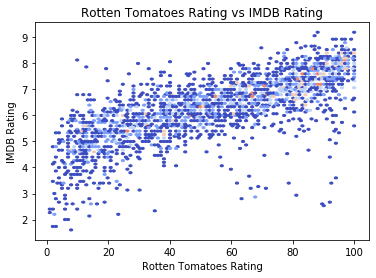

In [55]:
#b)

plt.hexbin(movies["Rotten_Tomatoes_Rating"], movies["IMDB_Rating"], cmap="coolwarm", mincnt=1)
plt.xlabel("Rotten Tomatoes Rating")
plt.ylabel("IMDB Rating")
plt.title("Rotten Tomatoes Rating vs IMDB Rating")
plt.show()


We can observe that both rating system does not have the same rating scale, i.e. Rotten Tomatoes rating scale is 0-100 and IMBB's one is from 0 to 10. Also, the ratings seem mostly linear, that is, as the IMDB ratings go up, the Rotten Tomatoes ratings follow.


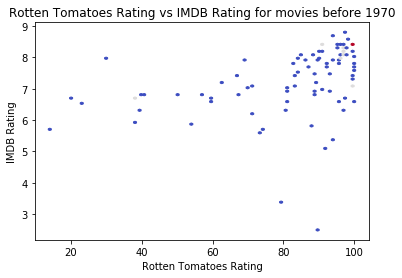

,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Running_Time_min,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes,Release_Year
count,1.290000e+02,1.290000e+02,2.000000e+00,1.300000e+02,0.0,96.000000,120.000000,120.000000,130.000000
mean,2.084259e+07,2.603317e+07,5.493817e+07,6.253851e+06,NaN,82.427083,7.165000,23526.983333,1958.223077
std,2.618528e+07,3.756361e+07,5.034371e+07,7.648852e+06,NaN,20.938378,1.199975,33410.494981,9.856541
min,0.000000e+00,0.000000e+00,1.933979e+07,1.140000e+05,NaN,14.000000,2.200000,45.000000,1928.000000
25%,5.400000e+06,5.400000e+06,3.713898e+07,1.800000e+06,NaN,77.750000,6.675000,2299.750000,1953.000000
50%,1.046250e+07,1.046250e+07,5.493817e+07,3.500000e+06,NaN,90.500000,7.300000,10073.000000,1961.000000
75%,3.000000e+07,3.330000e+07,7.273736e+07,7.800000e+06,NaN,97.000000,8.100000,33431.500000,1966.000000
max,1.632143e+08,2.862143e+08,9.053655e+07,5.000000e+07,NaN,100.000000,8.900000,172936.000000,1969.000000


In [56]:
#c) 
movies_sub = movies.loc[movies["Release_Year"] < 1970]
plt.hexbin(movies_sub["Rotten_Tomatoes_Rating"], movies_sub["IMDB_Rating"], cmap="coolwarm", mincnt=1)
plt.xlabel("Rotten Tomatoes Rating")
plt.ylabel("IMDB Rating")
plt.title("Rotten Tomatoes Rating vs IMDB Rating for movies before 1970")
plt.show()
movies_sub.describe()


We can notice that there is a higher variance (proven by the std) for the Rotten Tomatoes ratings compared to to IMDB ratings. 
In fact, while IMDB's ratings are mostly around 7, which can be qualified as an average rating for a movie, 
the same movie can have a much lower rating according to Rotten Tomatoes. However, both IMDB and Rotten Tomatoes seem
to have the same opinion for the upper ranked movies.

d)
This can be explained by the people that are providing these reviews. 
Indeed, the ratings from IMDB are based on IMDB user's reviews, while Rotten Tomatoes' ratings are given by film critics.
An average movie enthusiast often rate a movie based on a shallower analysis (i.e. how much they enjoyed the movie) 
than a film critic who consider many technical aspects in order to rate a movie. 

## Tidying



9. You have the following table in a variable called "test_scores",

| Student | Physics | Chemistry | English | Math |
|:--------|:--------|:----------|:--------|:-----|
| John    | 78      | 79        | 56      | 95   |
| Alice   | 58      | 72        | 91      | 81   |
| Rachel  | 22      | 61        | 88      | 64   |
| Tom     | 78      | 89        | 56      | 83   |


(a) Explain the format of the table after running this code,
```
test_scores_clean = pd.melt(
    test_scores,
    id_vars=['Student'],
    var_name=['Subject'],
    value_name='Score'
)
```

(b) Explain what the following code does.

```
test_scores.assign(
    quant=lambda df: df["Math"] + df["Physics"],
    overall=lambda df: df.drop("Student", axis=1).sum(axis=1)
)
```

a) 
The melt function of pandas basically reshapes wide data to long data, so now each student will appear 4 times 
with the respective subject and their respective score in the particular subject.



b)
It will create new columns quant and overall, where quant will be the sum of math and physics for each student and where
overall will be the sum of scores for each student.





# Visualization

12. Making a heatmap. Heatmaps are a way of plotting continuous values against
combinations of categorical variables. We'll use them to analyze a gene
expression dataset, collected to study changes in expression after the first
symmetry breaking event of the embryo. The rows of the matrix correspond to
genes, and the columns are different experimental samples.

  a. Make a heatmap of the [raw
data](https://gist.githubusercontent.com/krisrs1128/b8dc85b659186259715f8efe950ffce6/raw/77669ebdda4d6f8a029c2fdf506f4599277b50f4/hiiragi.csv),
using `sns.heatmap`. Make sure to use a diverging color scale, centered around zero.
 
 b. The heatmap is not particularly informative. It's hard to make comparisons
across either genes or samples, since there are so many of them. To remedy this,
order them using a clustering method (the details are unimportant), as
implemented in the `clustermap` function.

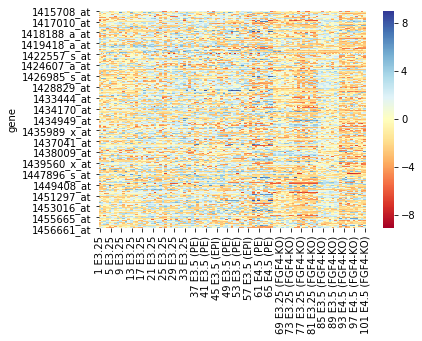

In [66]:
#a) 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

np.set_printoptions(threshold=sys.maxsize)

df = pd.read_csv("https://gist.githubusercontent.com/krisrs1128/b8dc85b659186259715f8efe950ffce6/raw/77669ebdda4d6f8a029c2fdf506f4599277b50f4/hiiragi.csv")
df = df.set_index("gene")
sns.heatmap(data=df, center=0, cmap='RdYlBu' )



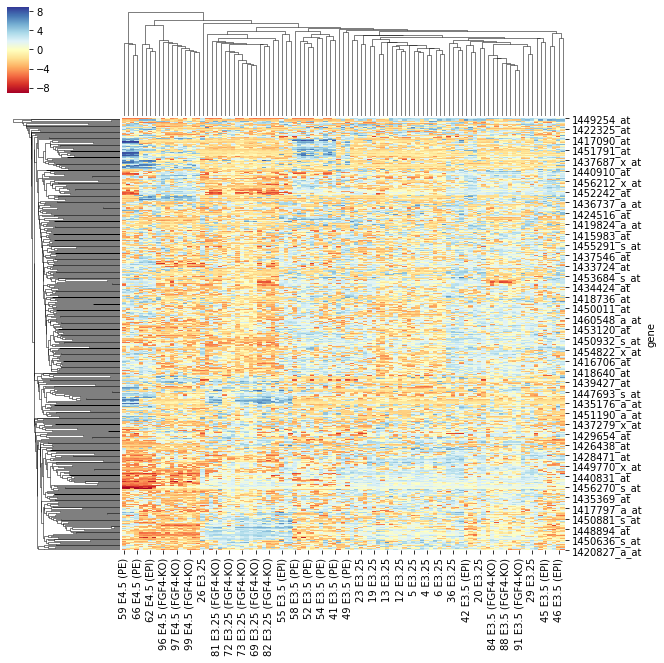

In [69]:
#b)
sns.clustermap(data=df, center=0, cmap='RdYlBu')